In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
import sunpy.map
import synthesizAR

%matplotlib inline

Try comparing potential and force-free field results. The results form Ruochun are based on the magnetogram of NOAA 1109. Need to go back and find this magnetogram, do a potential extrapolation, then load his field and compare the two, making sure to get the bounds correct.

In [2]:
bx = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.bx',comments='//').reshape((96,96,96))
by = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.by',comments='//').reshape((96,96,96))
bz = np.loadtxt('/Users/willbarnes/Desktop/rz_ff_field/hmi.bz',comments='//').reshape((96,96,96))

In [4]:
data = dict(
            Bx=(np.transpose(bx,axes=[1,2,0]), 'T'),
            By=(np.transpose(by,axes=[1,2,0]), 'T'),
            Bz=(np.transpose(bz,axes=[1,2,0]), 'T'))
bbox = np.array([[-50,50],[-50,50],[0,100]])
# assemble the dataset
extrap_field = yt.load_uniform_grid(data, data['Bx'][0].shape, bbox=bbox, length_unit=yt.units.cm,
                            geometry=('cartesian', ('x', 'y', 'z')))

yt : [INFO     ] 2017-11-20 16:59:31,850 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-11-20 16:59:31,851 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-11-20 16:59:31,852 Parameters: domain_left_edge          = [-50. -50.   0.]
yt : [INFO     ] 2017-11-20 16:59:31,853 Parameters: domain_right_edge         = [  50.   50.  100.]
yt : [INFO     ] 2017-11-20 16:59:31,855 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2017-11-20 17:12:27,091 Projection completed
yt : [INFO     ] 2017-11-20 17:12:27,093 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-20 17:12:27,094 ylim = -60.000000 40.000000
yt : [INFO     ] 2017-11-20 17:12:27,096 xlim = -50.000000 50.000000
yt : [INFO     ] 2017-11-20 17:12:27,097 ylim = -60.000000 40.000000
yt : [INFO     ] 2017-11-20 17:12:27,100 Making a fixed resolution buffer of (('stream', 'Bz')) 800 by 800
yt : [WARNING  ] 2017-11-20 17:12:27,129 Plot image for field ('stream', 'Bz') has both positive and negative values. Min = -1.480636, Max = 0.629870.
yt : [WARNING  ] 2017-11-20 17:12:27,131 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2017-11-20 17:12:27,442 Projection completed
yt : [INFO     ] 2017-11-20 17:12:27,523 Projection completed



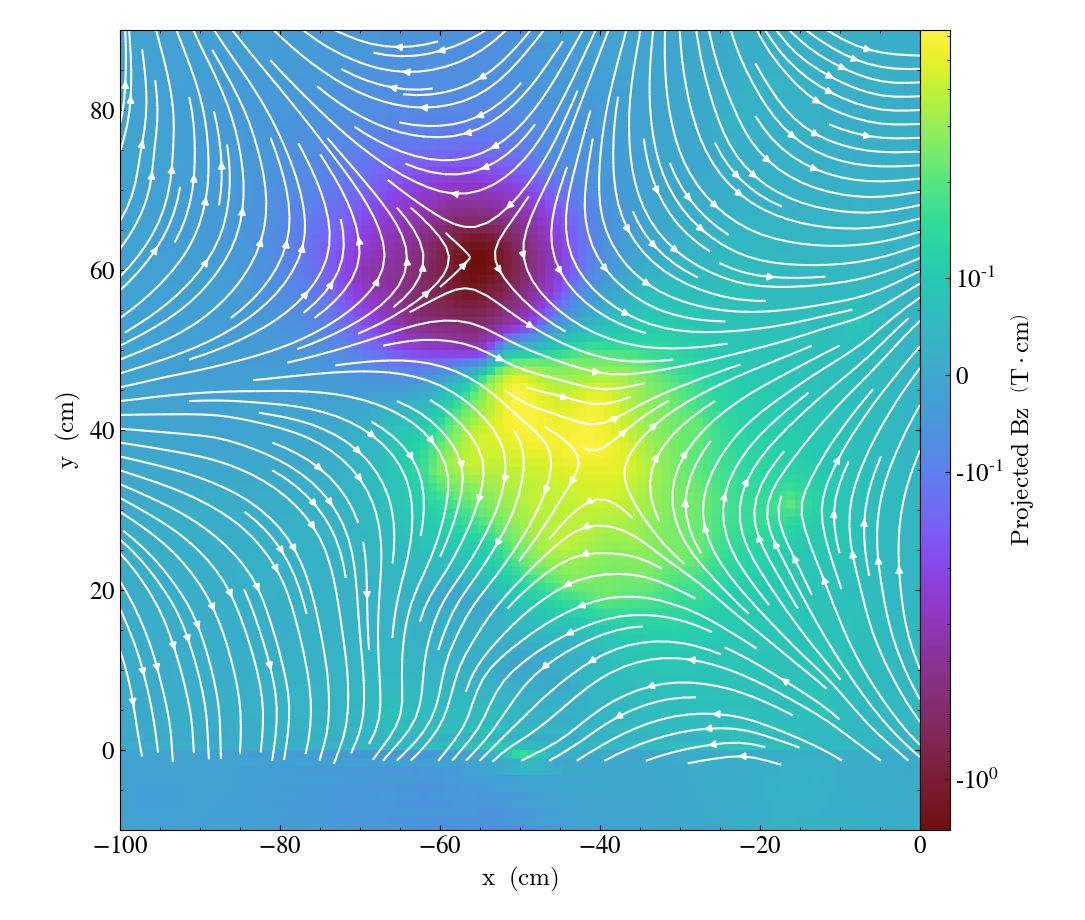

In [8]:
center=(extrap_field.domain_center
        +np.array([0,-0.1,0])*extrap_field.domain_width)
p = yt.ProjectionPlot(extrap_field,'z','Bz',
                 origin='lower-right-domain',
                 axes_unit='cm',
                 center=center,
                 width=((1*extrap_field.domain_width.value[1],'cm'),
                        (1*extrap_field.domain_width.value[2],'cm'))
                )
p.annotate_streamlines('Bx','By',density=2,plot_args={'color':'w'})
#p.set_zlim('Bz',-3e-2,3e-2)
#p.set_log('Bz',True,linthresh=1e-3)
p.show()